In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style

%matplotlib inline

In [2]:
df_ibm = pd.read_csv('IBM Attrition Data.csv')

In [3]:
df_ibm.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


In [4]:
df_ibm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 13 columns):
Age                        1470 non-null int64
Attrition                  1470 non-null object
Department                 1470 non-null object
DistanceFromHome           1470 non-null int64
Education                  1470 non-null int64
EducationField             1470 non-null object
EnvironmentSatisfaction    1470 non-null int64
JobSatisfaction            1470 non-null int64
MaritalStatus              1470 non-null object
MonthlyIncome              1470 non-null int64
NumCompaniesWorked         1470 non-null int64
WorkLifeBalance            1470 non-null int64
YearsAtCompany             1470 non-null int64
dtypes: int64(9), object(4)
memory usage: 149.4+ KB


In [5]:
df_ibm.isna().sum()

Age                        0
Attrition                  0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EnvironmentSatisfaction    0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
WorkLifeBalance            0
YearsAtCompany             0
dtype: int64

In [6]:
df_ibm['Department'].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [7]:
df_ibm['EducationField'].unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [8]:
df_ibm['MaritalStatus'].unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

In [9]:
df_ibm['Department']= df_ibm['Department'].map({'Sales':1,'Research & Development':2,'Human Resources':3})

In [10]:
df_ibm

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,1,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,2,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,2,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,2,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,2,2,1,Medical,1,2,Married,3468,9,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,2,23,2,Medical,3,4,Married,2571,4,3,5
1466,39,No,2,6,1,Medical,4,1,Married,9991,4,3,7
1467,27,No,2,4,3,Life Sciences,2,2,Married,6142,1,3,6
1468,49,No,1,2,3,Medical,4,2,Married,5390,2,2,9


In [11]:
df_ibm['EducationField']= df_ibm['EducationField'].replace(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], [1,2,3,4,5,6])

In [12]:
df_ibm.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,1,1,2,1,2,4,Single,5993,8,1,6
1,49,No,2,8,1,1,3,2,Married,5130,1,3,10
2,37,Yes,2,2,2,2,4,3,Single,2090,6,3,0
3,33,No,2,3,4,1,4,3,Married,2909,1,3,8
4,27,No,2,2,1,3,1,2,Married,3468,9,3,2


In [13]:
marital_status = lambda x : 1 if (x=='Married') else (2 if x == 'Single' else 3)

In [14]:
df_ibm['MaritalStatus']= df_ibm['MaritalStatus'].map(marital_status)

In [15]:
df_ibm.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,1,1,2,1,2,4,2,5993,8,1,6
1,49,No,2,8,1,1,3,2,1,5130,1,3,10
2,37,Yes,2,2,2,2,4,3,2,2090,6,3,0
3,33,No,2,3,4,1,4,3,1,2909,1,3,8
4,27,No,2,2,1,3,1,2,1,3468,9,3,2


In [16]:
attrition = lambda x: 1 if(x=='Yes') else 0

In [17]:
df_ibm['Attrition']=df_ibm['Attrition'].map(attrition)

In [18]:
df_ibm.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,1,1,1,2,1,2,4,2,5993,8,1,6
1,49,0,2,8,1,1,3,2,1,5130,1,3,10
2,37,1,2,2,2,2,4,3,2,2090,6,3,0
3,33,0,2,3,4,1,4,3,1,2909,1,3,8
4,27,0,2,2,1,3,1,2,1,3468,9,3,2


<h3> Age distribution of employees in IBM </h3>

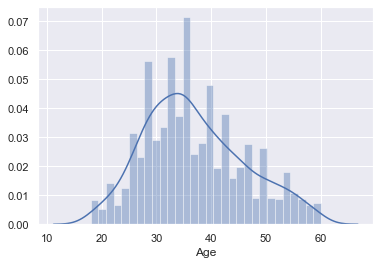

In [19]:
sns.set(color_codes=True)
sns.distplot(df_ibm['Age'], bins=30)

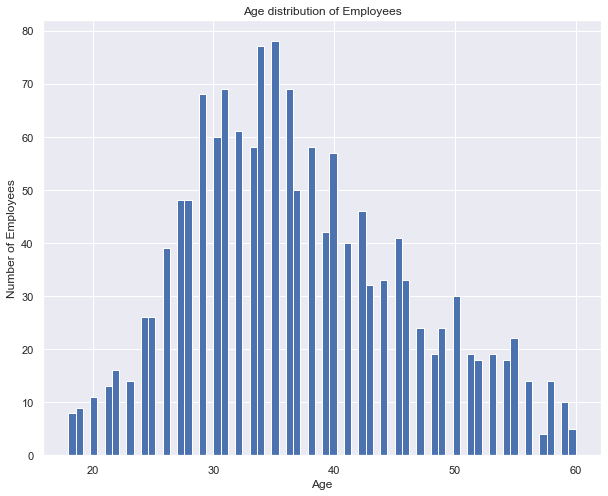

In [21]:
# histogram for age
plt.figure(figsize=(10,8))
df_ibm['Age'].hist(bins=70)
plt.title("Age distribution of Employees")
plt.xlabel("Age")
plt.ylabel("Number of Employees")
plt.show()

<h3> Explore attrition by age </h3>

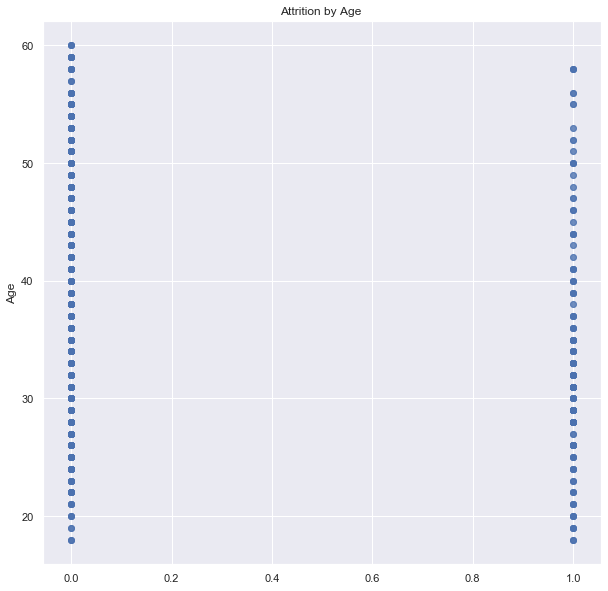

In [23]:
plt.figure(figsize=(10,10))
plt.scatter(df_ibm.Attrition,df_ibm.Age, alpha=.55)
plt.title("Attrition by Age ")
plt.ylabel("Age")
plt.grid(b=True, which='major',axis='y')
plt.show()

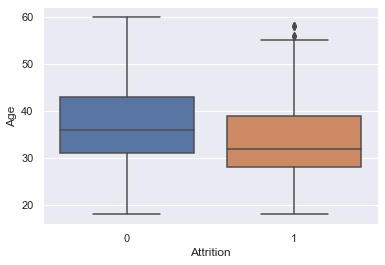

In [24]:
sns.boxplot(df_ibm['Attrition'], df_ibm['Age'])

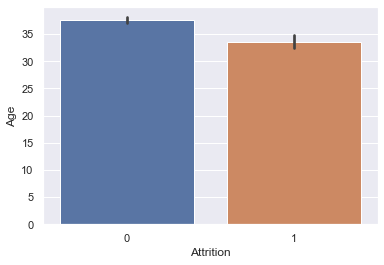

In [26]:
sns.barplot(df_ibm['Attrition'], df_ibm['Age'])

<h3> Explore data for Left employees </h3>

In [30]:
df_ibm.Attrition.value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

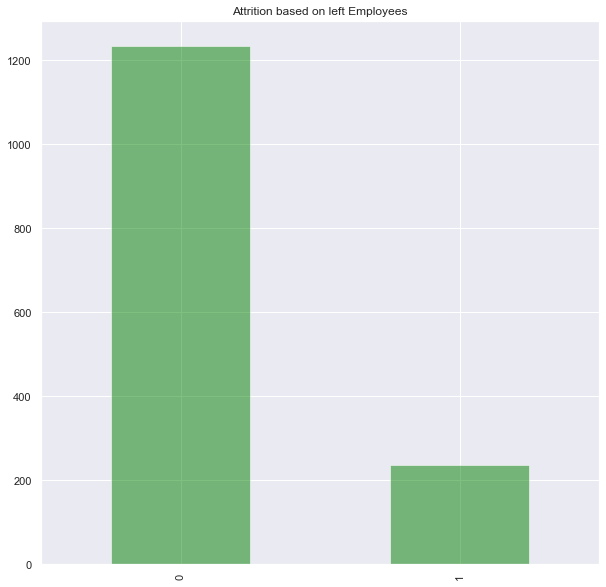

In [29]:
plt.figure(figsize=(10,10))
df_ibm.Attrition.value_counts().plot(kind='bar',color='green',alpha=0.5)
plt.title('Attrition based on left Employees')
plt.show()

<h3> Find out the distribution of employees by the education field </h3>

In [31]:
df_ibm.EducationField.value_counts()

1    606
3    464
4    159
5    132
2     82
6     27
Name: EducationField, dtype: int64

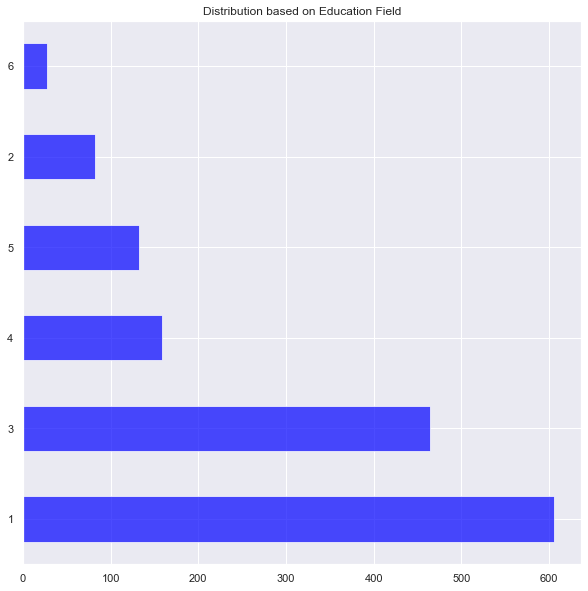

In [32]:
plt.figure(figsize=(10,10))
df_ibm.EducationField.value_counts().plot(kind='barh',color='blue',alpha=0.7)
plt.title('Distribution based on Education Field')
plt.show()

<h3> Give a bar chart for the number of married and unmarried employees </h3>

In [33]:
df_ibm.MaritalStatus.value_counts()

1    673
2    470
3    327
Name: MaritalStatus, dtype: int64

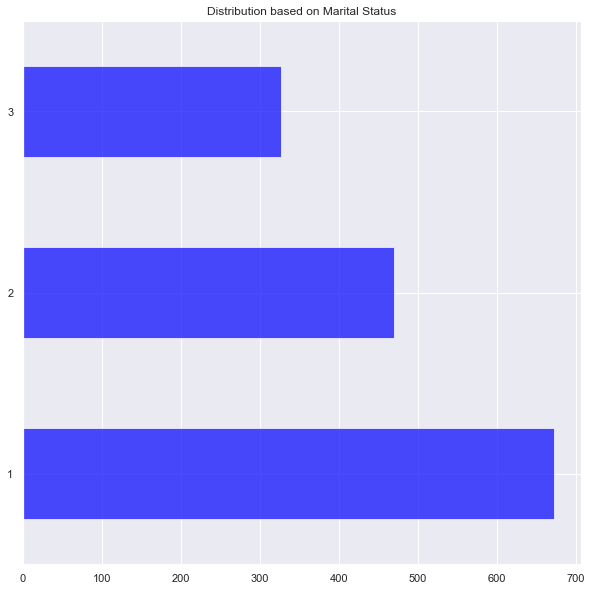

In [34]:
plt.figure(figsize=(10,10))
df_ibm.MaritalStatus.value_counts().plot(kind='barh',color='blue',alpha=0.7)
plt.title('Distribution based on Marital Status')
plt.show()

<h3> Build up a logistic regression model to predict which employees are likely to attrite. </h3>

In [36]:
df_ibm.describe()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,1.739456,9.192517,2.912925,2.462585,2.721769,2.728571,1.764626,6502.931293,2.693197,2.761224,7.008163
std,9.135373,0.367863,0.527792,8.106864,1.024165,1.431780,1.093082,1.102846,0.790757,4707.956783,2.498009,0.706476,6.126525
min,18.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,1.000000,0.000000
25%,30.000000,0.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2911.000000,1.000000,2.000000,3.000000
50%,36.000000,0.000000,2.000000,7.000000,3.000000,3.000000,3.000000,3.000000,2.000000,4919.000000,2.000000,3.000000,5.000000
75%,43.000000,0.000000,2.000000,14.000000,4.000000,3.000000,4.000000,4.000000,2.000000,8379.000000,4.000000,3.000000,9.000000
max,60.000000,1.000000,3.000000,29.000000,5.000000,6.000000,4.000000,4.000000,3.000000,19999.000000,9.000000,4.000000,40.000000


In [37]:
#Building the model
X = df_ibm.drop('Attrition',axis=1)
Y = df_ibm['Attrition']

In [38]:
X.head()

,Age,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,1,1,2,1,2,4,2,5993,8,1,6
1,49,2,8,1,1,3,2,1,5130,1,3,10
2,37,2,2,2,2,4,3,2,2090,6,3,0
3,33,2,3,4,1,4,3,1,2909,1,3,8
4,27,2,2,1,3,1,2,1,3468,9,3,2


In [39]:
Y.head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64

In [40]:
X.dtypes

Age                        int64
Department                 int64
DistanceFromHome           int64
Education                  int64
EducationField             int64
EnvironmentSatisfaction    int64
JobSatisfaction            int64
MaritalStatus              int64
MonthlyIncome              int64
NumCompaniesWorked         int64
WorkLifeBalance            int64
YearsAtCompany             int64
dtype: object

In [41]:
Y.dtypes

dtype('int64')

In [42]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model = model.fit(X, Y)

# check the accuracy on the training set
model.score(X, Y)

/Users/rgm/Python/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8414965986394558

In [43]:
Y.mean()

0.16122448979591836

In [46]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,Y, test_size=0.3, random_state=0)
model_log=LogisticRegression()
model_log.fit(X_train, y_train)

/Users/rgm/Python/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
predicted= model_log.predict(X_test)
print (predicted)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [48]:
probs = model_log.predict_proba(X_test)
print (probs)

[[0.88884691 0.11115309]
 [0.85804    0.14196   ]
 [0.80320187 0.19679813]
 [0.8046951  0.1953049 ]
 [0.84475259 0.15524741]
 [0.79274143 0.20725857]
 [0.73667156 0.26332844]
 [0.74416788 0.25583212]
 [0.97800501 0.02199499]
 [0.82782481 0.17217519]
 [0.97451731 0.02548269]
 [0.76990317 0.23009683]
 [0.93608341 0.06391659]
 [0.72959139 0.27040861]
 [0.83974088 0.16025912]
 [0.89279352 0.10720648]
 [0.93158795 0.06841205]
 [0.91307024 0.08692976]
 [0.85613082 0.14386918]
 [0.71893295 0.28106705]
 [0.78265545 0.21734455]
 [0.95567659 0.04432341]
 [0.89010586 0.10989414]
 [0.93498953 0.06501047]
 [0.56542427 0.43457573]
 [0.82497249 0.17502751]
 [0.84647082 0.15352918]
 [0.95019302 0.04980698]
 [0.72298864 0.27701136]
 [0.88093912 0.11906088]
 [0.90555625 0.09444375]
 [0.8260889  0.1739111 ]
 [0.84489875 0.15510125]
 [0.89652765 0.10347235]
 [0.94940822 0.05059178]
 [0.92906341 0.07093659]
 [0.92810718 0.07189282]
 [0.89093261 0.10906739]
 [0.94645849 0.05354151]
 [0.85290808 0.14709192]


In [49]:
from sklearn import metrics

print (metrics.accuracy_score(y_test, predicted))
print (metrics.roc_auc_score(y_test, probs[:, 1]))

0.8458049886621315
0.6949942241047362


In [50]:
print (metrics.confusion_matrix(y_test, predicted))
print (metrics.classification_report(y_test, predicted))

[[370   1]
 [ 67   3]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       371
           1       0.75      0.04      0.08        70

    accuracy                           0.85       441
   macro avg       0.80      0.52      0.50       441
weighted avg       0.83      0.85      0.78       441

